In [1]:
import pandas as pd
import os
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
import matplotlib
from matplotlib.dates import DateFormatter
import matplotlib.dates as md
import datetime as dt
from pivottablejs import pivot_ui
from IPython.display import HTML
#import qgrid
#import ipywidgets as widgets

In [2]:
def time_to_int(dateobj):
    total = int(dateobj.strftime('%S'))
    total += int(dateobj.strftime('%M')) * 60
    total += int(dateobj.strftime('%H')) * 60 * 60
    total += (int(dateobj.strftime('%j')) - 1) * 60 * 60 * 24
    total += (int(dateobj.strftime('%Y')) - 1970) * 60 * 60 * 24 * 365
    return total

def myfunc(x):
    return slope * x + intercept

In [3]:
db_filename = 'todo.db'

db_is_new = not os.path.exists(db_filename)

conn = sqlite3.connect(db_filename)

if db_is_new:
    print('Need to create schema')
else:
    print('Database exists, assume schema does, too.')

conn.close()

Database exists, assume schema does, too.


In [4]:
prices = pd.read_excel('SP1500_screener_multiple.xlsx',sheet_name="SP1500_Sectors_Indexes_Prices")

In [5]:
screener = pd.read_excel('SP1500_screener_multiple.xlsx',sheet_name="Screener")

In [6]:
stock_sectors = pd.read_excel('SP1500_screener_multiple.xlsx',sheet_name="stock_sectors")
stock_sectors.set_index(stock_sectors.columns[0],inplace=True)
stock_sectors.columns = ['Symbol']

In [7]:
stock_indexes = pd.read_excel('SP1500_screener_multiple.xlsx',sheet_name="SP1500")
stock_indexes.drop(stock_indexes.columns[0], axis=1, inplace=True)
stock_indexes.set_index(stock_indexes.columns[0],inplace=True)
stock_indexes

,Market Index
Symbol,
MMM,SP500
AOS,SP500
ABT,SP500
ABBV,SP500
ABMD,SP500
...,...
CLF,SP400
IAA,SP400
HAE,SP400


In [8]:
spdr_indexes = pd.read_excel('SP1500_screener_multiple.xlsx',sheet_name="spdr_indexes")
#vanguard_sectors.drop(vanguard_sectors.columns[0], axis=1, inplace=True)
spdr_indexes.set_index(spdr_indexes.columns[0],inplace=True)
spdr_indexes.columns=['Symbol']
spdr_indexes

,Symbol
Unnamed: 0,
SP1500,SPTM
SP500,SPY
SP600,SLY
SP400,MDYG


In [9]:
vanguard_sectors = pd.read_excel('SP1500_screener_multiple.xlsx',sheet_name="vanguard_sectors")
#vanguard_sectors.drop(vanguard_sectors.columns[0], axis=1, inplace=True)
vanguard_sectors.set_index(vanguard_sectors.columns[0],inplace=True)
vanguard_sectors.columns=['Symbol']
vanguard_sectors

,Symbol
Unnamed: 0,
Communication Services ETF,VOX
Consumer Discretionary ETF,VCR
Consumer Staples ETF,VDC
Energy ETF,VDE
Financials ETF,VFH
Health Care ETF,VHT
Industrials ETF,VIS
Information Technology ETF,VGT
Materials ETF,VAW


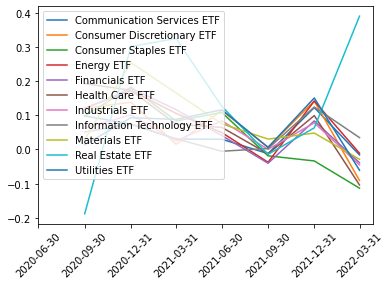

In [10]:
sector_dataset = pd.DataFrame()

for v in vanguard_sectors['Symbol']:
    subset = prices[prices['Symbol']==v].set_index('Date')[['Adj Close']].asfreq('Q').pct_change()
    
    plt.plot(subset)
    subset['Symbol'] = v
    sector_dataset = pd.concat([sector_dataset,subset],axis=0)
    #plt.xticks(np.array(subset.index)[np.arange(0,len(subset.index),int(len(subset.index)))], rotation=45)
    plt.xticks(subset.index, rotation=45)
plt.legend(vanguard_sectors['Symbol'].index,loc=2)    
plt.show()

d_ = []
for d in sector_dataset.reset_index()['Date']:
    d_.append(d.strftime('%Y-%m-%d'))


In [11]:

sector_dataset['Date'] = d_

sector_dataset = sector_dataset.reset_index(drop=True).set_index('Date')
sector_dataset_pivot = sector_dataset.reset_index().pivot_table(values=['Adj Close'], index=['Symbol'],columns=['Date'])

sector_dataset_pivot.columns = sector_dataset_pivot.columns.droplevel(0)
sector_dataset_pivot

Date,2020-09-30,2020-12-31,2021-03-31,2021-06-30,2021-09-30,2021-12-31,2022-03-31
Symbol,,,,,,,
VAW,0.028859,0.253698,0.165207,0.074954,0.030269,0.047861,-0.028752
VCR,0.120087,0.138205,0.015110,0.114030,0.006319,0.141743,-0.090992
VDC,0.097573,0.182130,0.083288,0.108092,-0.018717,-0.033664,-0.113234
VDE,0.120651,0.172364,0.105419,0.049264,-0.037498,0.141478,-0.011061
VFH,0.118587,0.178685,0.116450,0.040612,-0.040377,0.083509,-0.038858
VGT,0.051209,0.073335,0.031042,-0.005272,0.002739,0.124048,0.034591
VHT,0.192380,0.172875,0.073815,0.064435,-0.012866,0.099010,-0.103975
VIS,0.062281,0.101111,0.025327,0.083442,0.000121,0.077925,-0.045192
VNQ,-0.188316,0.300830,0.324479,0.126094,-0.014210,0.063134,0.389741


In [12]:
#qgrid.show_grid(sector_dataset_pivot)

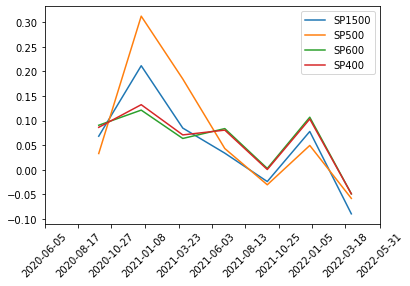

In [13]:
for v in spdr_indexes['Symbol']:
    subset = prices[prices['Symbol']==v].set_index('Date')
    plt.plot(subset[['Adj Close']].asfreq('Q').pct_change())
    plt.xticks(np.array(subset.index)[np.arange(0,len(subset.index),int(len(subset.index)/10))], rotation=45)
plt.legend(spdr_indexes['Symbol'].index)    
plt.show()

In [14]:
screener['Symbol']

0        AMZN
1        GOOG
2       GOOGL
3         NVR
4         AZO
        ...  
1515     NYMT
1516      TWO
1517      GNW
1518      IVR
1519     JW-A
Name: Symbol, Length: 1520, dtype: object

In [15]:
threshold = .9875

In [16]:
screener_good = screener[screener['risk_trend']!='missing']

risk_trend_threshold = screener_good['risk_trend'].quantile(q=[threshold]).values[0]


In [17]:
risk_trend_threshold

162.20025215148925

In [18]:
risk_screened = screener_good[screener_good['risk_trend']>risk_trend_threshold]
risk_screened

,Symbol,max_2y,min_2y,std_2y,mean_2y,max_1y,min_1y,std_1y,mean_1y,latest_p,...,supply_trend_90d,supply_trend_60d,supply_trend_30d,vol_30d_2yr,pct_1yr,pct_2yr,MIN_Lookback_One_Year,MIN_Lookback_6_Months,MIN_Lookback_2_Months,MIN_Lookback_1_Months
0,AMZN,3773.080078,2025.199951,296.531055,3180.708332,3773.080078,2025.199951,375.036636,3205.775125,2447,...,339,339,339,82062094.834711,0.241321,0.241321,3554,3773.080078,3773.080078,3773.080078
1,GOOG,3042,1347.01001,517.905498,2259.353414,3042,2044.160034,201.916485,2704.086196,2291.280029,...,163.380127,163.380127,163.380127,30572394.834711,0.247655,0.557095,2468,3037,3042,3042
2,GOOGL,3030.929932,1351.650024,511.86544,2244.401052,3030.929932,2037.689941,208.932014,2684.163652,2290.820068,...,161.650146,161.650146,161.650146,34995544.628099,0.254853,0.55927,2431.379883,3019.330078,3030.929932,3030.929932
3,NVR,5982.450195,3050,592.039014,4608.963436,5982.450195,3998,416.209297,4986.021081,4428,...,250.080078,250.080078,250.080078,462794.421488,0.216685,0.469914,5308.47998,5620.529785,5982.450195,5982.450195
4,AZO,2267.399902,1074.449951,339.630637,1527.495833,2267.399902,1371.140015,212.855434,1819.807737,2058.040039,...,236.910034,236.910034,236.910034,4200658.264463,0.766407,0.824502,1542.300049,1941.359985,2110,2267.399902
5,TSLA,1243.48999,173.240005,243.23606,697.82855,1243.48999,582.880005,165.159902,861.726069,703.549988,...,49.630005,49.630005,49.630005,778632716.115703,0.182664,0.495501,900.400024,1243.48999,1243.48999,1243.48999
6,CABO,2326.800049,1049.810059,223.70396,1769.685812,2136.13501,1049.810059,251.298169,1672.91016,1288.589966,...,163.159912,163.159912,163.159912,821576.446281,0.219805,0.186987,2136.13501,2136.13501,2136.13501,2136.13501
7,CMG,1958.550049,964.5,229.164457,1474.752341,1958.550049,1230.910034,191.831053,1631.185791,1375.060059,...,96.370117,96.370117,96.370117,6103354.338843,0.198106,0.413017,1579.52002,1958.550049,1958.550049,1958.550049
8,BKNG,2715.659912,1532.829956,262.171462,2152.164184,2715.659912,1796.449951,150.927635,2290.63055,2335.870117,...,356.820068,241.280029,241.280029,7870702.892562,0.58683,0.678914,2516,2687.290039,2715.659912,2715.659912
9,DXCM,659.450012,267.570007,80.172577,431.14887,659.450012,267.570007,83.597535,480.137977,292.790009,...,8.26001,8.26001,8.26001,17499131.818182,0.064356,0.064356,456.230011,659.450012,659.450012,659.450012


In [19]:
screener.columns

Index(['Symbol', 'max_2y', 'min_2y', 'std_2y', 'mean_2y', 'max_1y', 'min_1y',
       'std_1y', 'mean_1y', 'latest_p', '2yr_close_0pct', '2yr_close_2pct',
       '2yr_close_9pct', '2yr_close_25pct', '2yr_close_50pct',
       '2yr_close_75pct', '2yr_close_91pct', '2yr_close_98pct',
       '2yr_close_100pct', '1yr_close_0pct', '1yr_close_2pct',
       '1yr_close_9pct', '1yr_close_25pct', '1yr_close_50pct',
       '2yr_close_75pct.1', '1yr_close_91pct', '1yr_close_98pct',
       '1yr_close_100pct', 'risk_trend', 'supply_trend_1yr',
       'supply_trend_180d', 'supply_trend_90d', 'supply_trend_60d',
       'supply_trend_30d', 'vol_30d_2yr', 'pct_1yr', 'pct_2yr',
       'MIN_Lookback_One_Year', 'MIN_Lookback_6_Months',
       'MIN_Lookback_2_Months', 'MIN_Lookback_1_Months'],
      dtype='object')

In [20]:
"""
above_1yearSDev = screener_good[screener_good['latest_p']>screener['mean_1y']+screener_good['std_1y']]['Symbol'].values
above_2yearSDev = screener_good[screener_good['latest_p']>screener['mean_2y']+screener_good['std_2y']]['Symbol'].values
above_yearSDev = np.intersect1d(above_1yearSDev,above_2yearSDev)
"""

"\nabove_1yearSDev = screener_good[screener_good['latest_p']>screener['mean_1y']+screener_good['std_1y']]['Symbol'].values\nabove_2yearSDev = screener_good[screener_good['latest_p']>screener['mean_2y']+screener_good['std_2y']]['Symbol'].values\nabove_yearSDev = np.intersect1d(above_1yearSDev,above_2yearSDev)\n"

In [21]:
#above_yearSDev

In [22]:
"""
above_2year_t = screener[screener['pct_2yr']>threshold]['Symbol'].values
above_1year_t = screener[screener['pct_1yr']>threshold]['Symbol'].values
above_years_t = np.intersect1d(above_2year_t,above_1year_t)
"""

"\nabove_2year_t = screener[screener['pct_2yr']>threshold]['Symbol'].values\nabove_1year_t = screener[screener['pct_1yr']>threshold]['Symbol'].values\nabove_years_t = np.intersect1d(above_2year_t,above_1year_t)\n"

In [23]:
#above_years_t

In [24]:
#above_combined = np.intersect1d(above_yearSDev,above_years_t)

In [25]:
#above_combined

In [26]:
#screened_final_set = np.intersect1d(risk_screened,above_combined)

In [27]:
screened_final_set = risk_screened.set_index('Symbol')
#screened_final_set

In [28]:
#pivot_ui(prices, outfile_path='pivottablejs.html')
#HTML('pivottablejs.html')

AMZN
supply trend: 82062094.83471075
Sector: Consumer Cyclical
Index: SP500


C:\Users\User\AppData\Local\Temp\ipykernel_8568\1301938157.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 45)


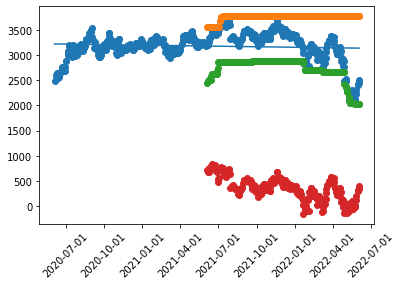

GOOG
supply trend: 30572394.83471074
Sector: Communication Services
Index: SP500


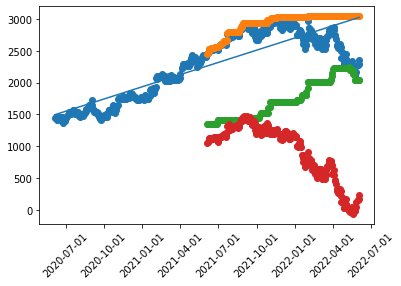

GOOGL
supply trend: 34995544.62809917
Sector: Communication Services
Index: SP500


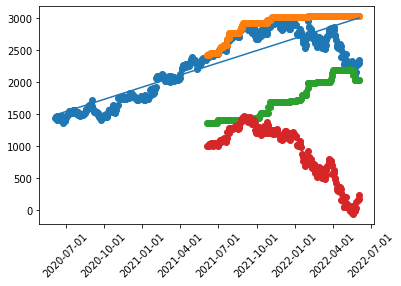

NVR
supply trend: 462794.4214876033
Sector: Consumer Cyclical
Index: SP500


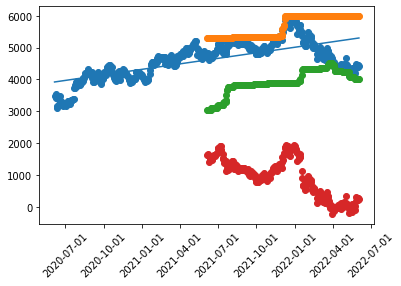

AZO
supply trend: 4200658.26446281
Sector: Consumer Cyclical
Index: SP500


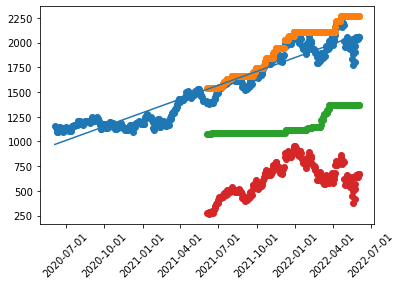

TSLA
supply trend: 778632716.1157025
Sector: Consumer Cyclical
Index: SP500


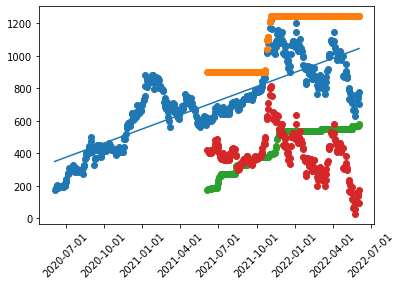

CABO
supply trend: 821576.4462809918
Sector: error
Index: SP400


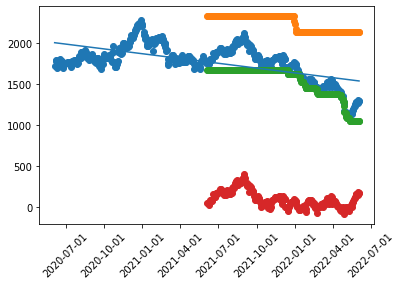

CMG
supply trend: 6103354.338842975
Sector: Consumer Cyclical
Index: SP500


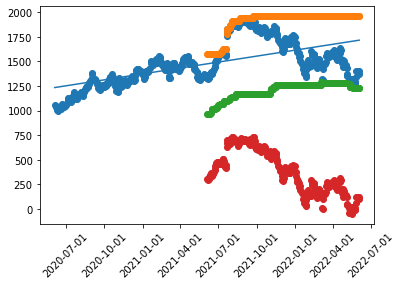

BKNG
supply trend: 7870702.892561983
Sector: Consumer Cyclical
Index: SP500


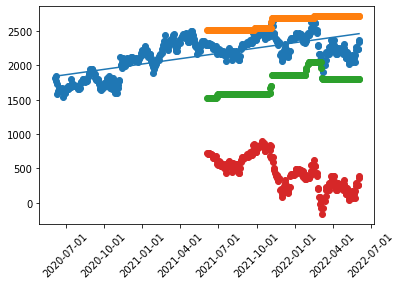

DXCM
supply trend: 17499131.81818182
Sector: Healthcare
Index: SP500


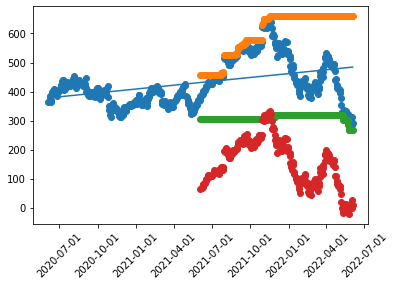

MTD
supply trend: 2357874.79338843
Sector: Healthcare
Index: SP500


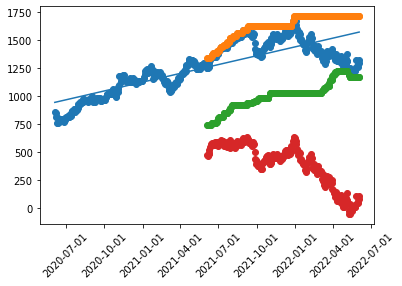

IDXX
supply trend: 9319973.760330578
Sector: Healthcare
Index: SP500


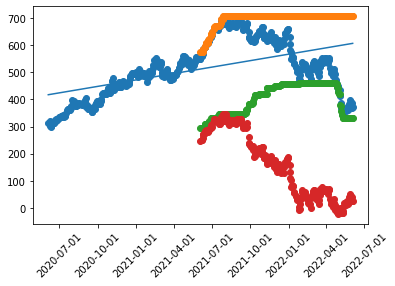

NFLX
supply trend: 126433610.9504132
Sector: Communication Services
Index: SP500


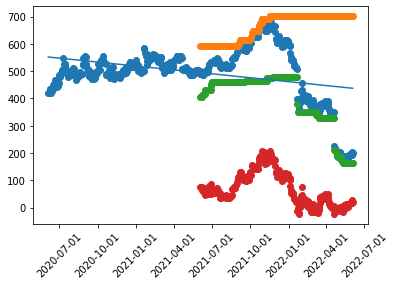

COST
supply trend: 49053633.67768595
Sector: Consumer Defensive
Index: SP500


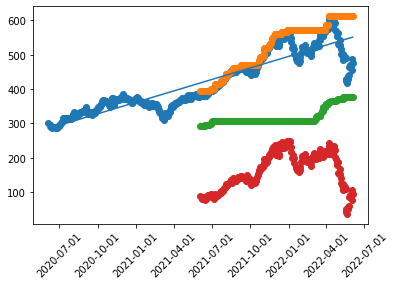

ORLY
supply trend: 10904319.62809917
Sector: Consumer Cyclical
Index: SP500


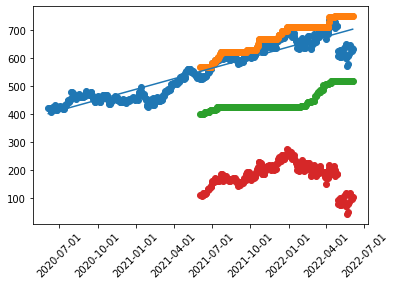

ALGN
supply trend: 14767799.79338843
Sector: Healthcare
Index: SP500


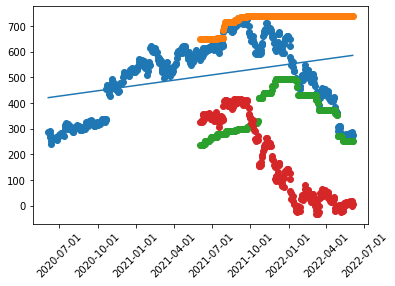

COKE
supply trend: 639075.4132231405
Sector: Consumer Defensive
Index: SP600


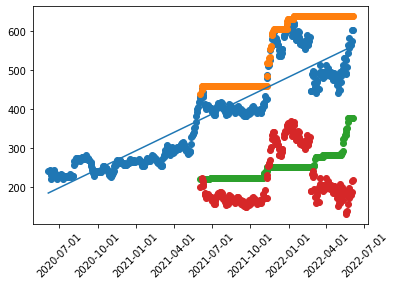

BLK
supply trend: 13660971.90082645
Sector: Financial Services
Index: SP500


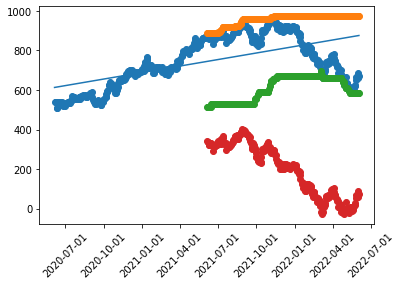

CAR
supply trend: 37830735.53719008
Sector: Industrials
Index: SP400


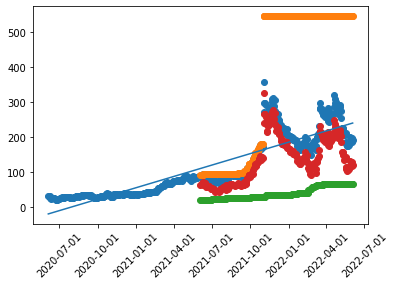

In [29]:
for s in screened_final_set.index:
    print(s)
    subset=prices[prices['Symbol']==s]
    
    dates = []
    for t in subset['Date'].values:
        d = pd.Timestamp(t).strftime('%Y-%m-%d')
        dates.append(d)
        dto = datetime.strptime(d, '%Y-%m-%d').date()

    old_ordinal = [datetime.strptime(i, '%Y-%m-%d').toordinal() for i in dates]
    new_ordinal = old_ordinal + md.date2num(np.datetime64('0000-12-31'))
    x = new_ordinal
    y= subset['Adj Close']

    slope, intercept, r, p, std_err = stats.linregress(x, y)

    mymodel = list(map(myfunc, x))

    fig, ax = plt.subplots()
    
    plt.scatter(x, y)
    plt.scatter(x, subset['trailing_1yr_max'])
    plt.scatter(x, subset['trailing_1yr_min'])
    
    #plt.scatter(x, subset['supply_trend'])
    plt.scatter(x, subset['supply_trend_1yr'])
    print("supply trend:",screener.loc[np.where(screener.set_index('Symbol').index==s)[0][0]]['vol_30d_2yr'])
    print("Sector:", stock_sectors.iloc[np.where(np.array(stock_sectors.index)==s)[0][0]][0])
    print("Index:", stock_indexes.iloc[np.where(np.array(stock_indexes.index)==s)[0][0]][0])
    
    #print("Sector:",screener.loc[np.where(screener.set_index('Symbol').index==s)[0][0]]['Sector'])
    #print("Sector:",screener.loc[np.where(screener.set_index('Symbol').index==s)[0][0]]['vol_30d_2yr'])

    plt.plot(x, mymodel)
    
    l = matplotlib.dates.AutoDateLocator()
    f = matplotlib.dates.ConciseDateFormatter(l)    
    
    ax.set_xticklabels(ax.get_xticks(), rotation = 45)
    
    locator = matplotlib.dates.AutoDateLocator()
    formatter = matplotlib.dates.ConciseDateFormatter(locator)

    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    
    date_form = DateFormatter("%Y-%m-%d")
    ax.xaxis.set_major_formatter(date_form)
    plt.show()